In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

sns.set_style('darkgrid')
print('Libraries imported successfully!')

Libraries imported successfully!


In [4]:
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')

df = pd.merge(orders, customers, on='customer_id')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [5]:
df = pd.merge(df, order_items, on='order_id')

In [6]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [7]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [51]:
#Some Features
weekly_sales = df.set_index('order_purchase_timestamp').resample("W-MON")['price'].sum().reset_index()
weekly_sales = weekly_sales.rename(columns={'order_purchase_timestamp': 'Week', 'price': 'TotalSales'})
weekly_sales = weekly_sales[weekly_sales['Week'] >= '2017-01-09']
weekly_sales = weekly_sales.iloc[:-1]
weekly_sales = weekly_sales.reset_index(drop=True)
weekly_sales

,Week,TotalSales
0,2017-01-09,4048.55
1,2017-01-16,15571.37
2,2017-01-23,27584.01
3,2017-01-30,61992.81
4,2017-02-06,70448.65
...,...,...
81,2018-07-30,241322.59
82,2018-08-06,293930.63
83,2018-08-13,262075.33
84,2018-08-20,241476.00


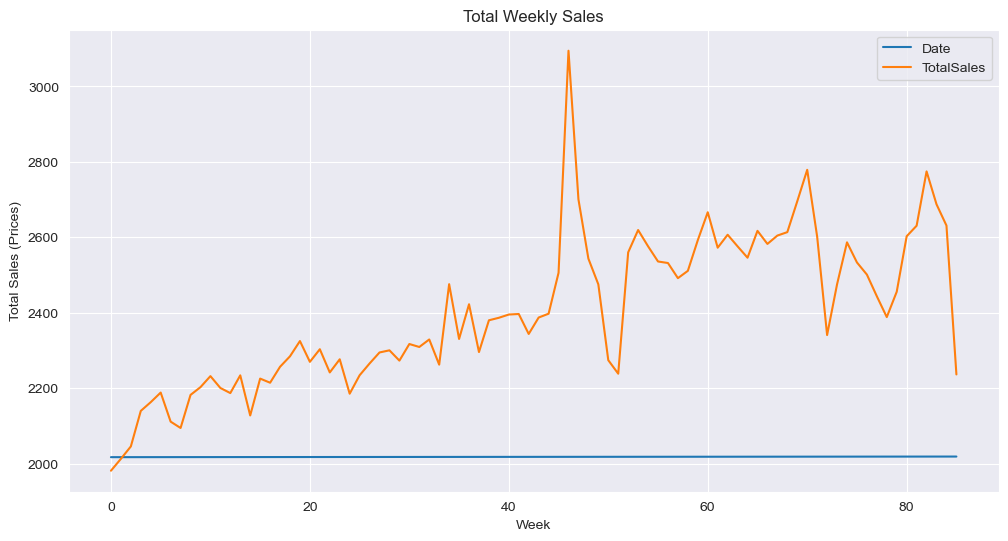

In [48]:
#Group by month/year and take the sum of all the aggregated prices to get monthly sales
#monthly_sales = df.groupby('month_year')['price'].sum()

#plot the results of the above
weekly_sales.plot(figsize=(12,6), title='Total Weekly Sales')
plt.ylabel('Total Sales (Prices)')
plt.xlabel('Week')
plt.show()

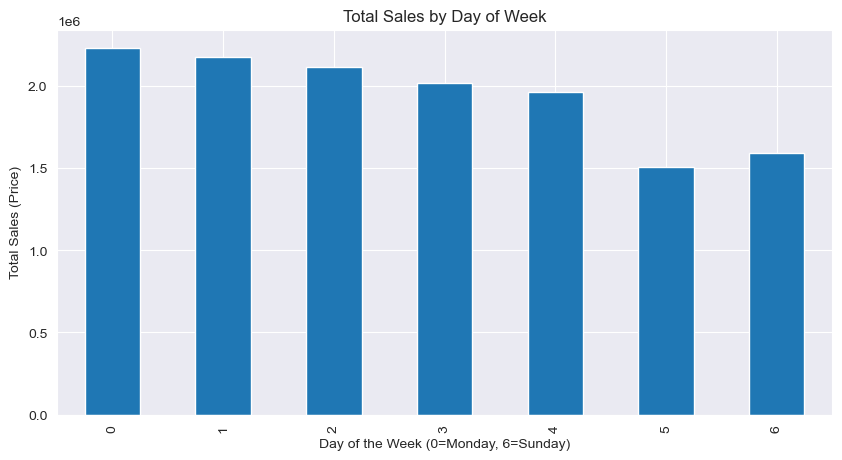

In [49]:
daily_sales = df.groupby('day_of_week')['price'].sum()

daily_sales.plot(kind='bar',
                figsize=(10,5),
                 title = 'Total Sales by Day of Week')
plt.ylabel('Total Sales (Price)')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.show()

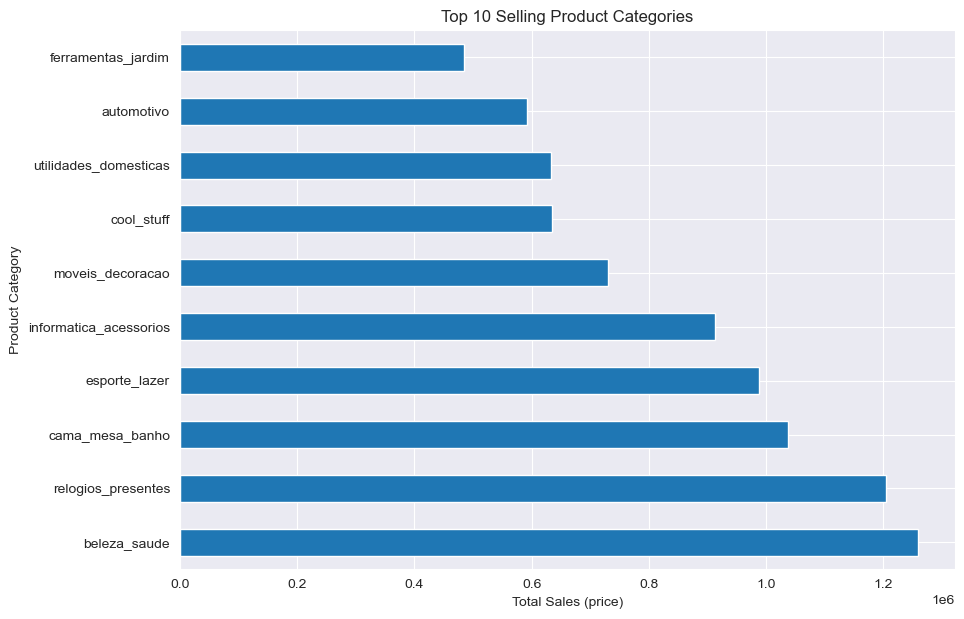

In [11]:
products_df = pd.read_csv('olist_products_dataset.csv')

df = pd.merge(df, products_df, on='product_id')

category_sales = df.groupby('product_category_name')['price'].sum()

top_10_categories = category_sales.sort_values(ascending=False).head(10)

top_10_categories.plot(kind='barh',
                      figsize=(10,7),
                      title='Top 10 Selling Product Categories')
plt.xlabel('Total Sales (price)')
plt.ylabel('Product Category')
plt.show()

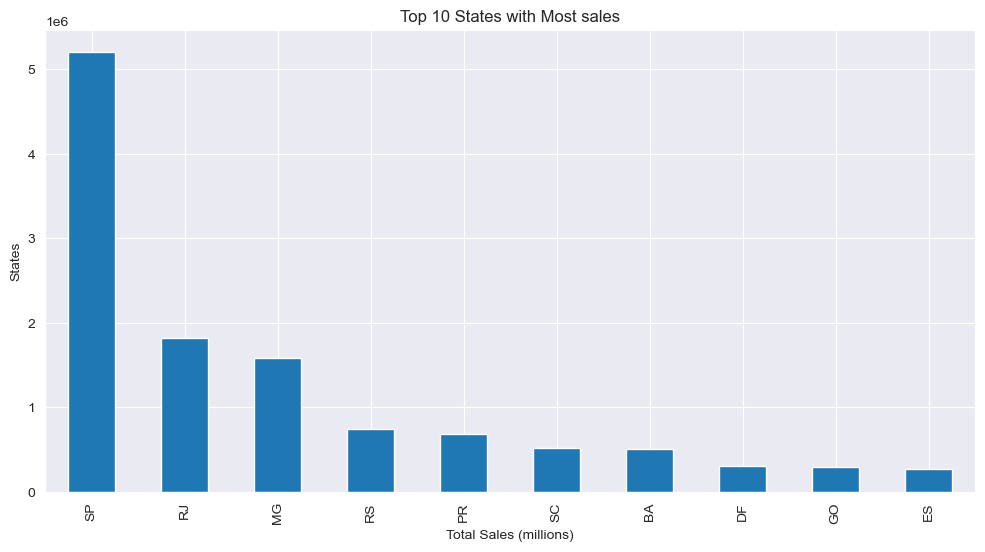

In [12]:
state_sales = df.groupby('customer_state')['price'].sum()

top_10_states = state_sales.sort_values(ascending=False).head(10)

top_10_states.plot(kind='bar',
                   figsize=(12,6),
                   title='Top 10 States with Most sales')
plt.ylabel('States')
plt.xlabel('Total Sales (millions)')
plt.show()

In [53]:
weekly_sales

,Week,TotalSales
0,2017-01-09,4048.55
1,2017-01-16,15571.37
2,2017-01-23,27584.01
3,2017-01-30,61992.81
4,2017-02-06,70448.65
...,...,...
81,2018-07-30,241322.59
82,2018-08-06,293930.63
83,2018-08-13,262075.33
84,2018-08-20,241476.00


In [56]:
model_df = weekly_sales.copy()

#feature 1: lag_1 (Sales from 1 week ago)
model_df['sales_last_week'] = model_df['TotalSales'].shift(1)

#feature 2: lag_4 (Sales from 1 month ago)
model_df['sales_1_month_ago'] = model_df['TotalSales'].shift(4)

#feature 3: Rolling mean (Trend of last 4 weeks)
model_df['trend_4w'] = model_df['TotalSales'].rolling(window=4).mean().shift(1)

#feature 4: week of year
model_df['week_of_year'] = model_df['Week'].dt.isocalendar().week.astype(int)

#feature 5: Black friday or not?
#model_df['is_black_friday'] = model_df['month_number'].apply(lambda m: 1 if m==11 else 0)

#Cleaning the dataset
model_df = model_df.dropna()

model_df

,Week,TotalSales,sales_last_week,sales_1_month_ago,trend_4w,week_of_year
4,2017-02-06,70448.65,61992.81,4048.55,27299.1850,6
5,2017-02-13,79733.54,70448.65,15571.37,43899.2100,7
6,2017-02-20,51587.09,79733.54,27584.01,59939.7525,8
7,2017-02-27,45429.11,51587.09,61992.81,65940.5225,9
8,2017-03-06,77467.38,45429.11,70448.65,61799.5975,10
...,...,...,...,...,...,...
81,2018-07-30,241322.59,231130.21,173007.47,183586.9325,31
82,2018-08-06,293930.63,241322.59,152826.03,200665.7125,32
83,2018-08-13,262075.33,293930.63,177384.02,235941.8625,33
84,2018-08-20,241476.00,262075.33,231130.21,257114.6900,34


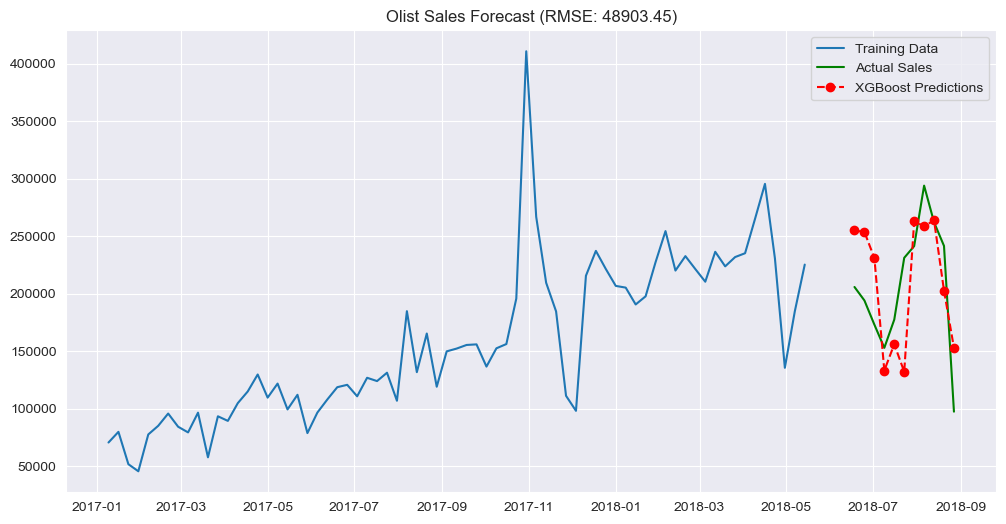

In [86]:
features = ['sales_last_week', 'sales_1_month_ago', 'trend_4w', 'week_of_year']
target = 'TotalSales'

test_weeks = 11

X_train = model_df[features].iloc[:-test_weeks]
y_train = model_df[target].iloc[:-test_weeks]

X_test = model_df[features].iloc[-test_weeks:]
y_test = model_df[target].iloc[-test_weeks:]

model = XGBRegressor(n_estimators=1000, learning_rate = 0.05, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

train_dates = weekly_sales['Week'].iloc[:len(y_train):]
test_dates = weekly_sales['Week'].iloc[-len(y_test):]

plt.figure(figsize = (12, 6))
plt.plot(train_dates, y_train, label='Training Data')
plt.plot(test_dates, y_test, label='Actual Sales', color='green')
plt.plot(test_dates, predictions, label='XGBoost Predictions', color='red', linestyle='--', marker='o')
plt.title(f'Olist Sales Forecast (RMSE: {rmse:.2f})')
plt.legend()
plt.show()

In [89]:
%%writefile train.py

import pandas as pd
import joblib
from xgboost import XGBRegressor

DATA_PATH = 'olist_orders_dataset.csv'
ITEMS_PATH = 'olist_order_items_dataset.csv'
MODEL_PATH = 'xgboost_sales_model.pkl'

#load the data
#preprocess data
#create features
#train the model
#execute

def load_data():
    orders = pd.read_csv(DATA_PATH)
    items = pd.read_csv(ITEMS_PATH)

    df = pd.merge(orders, items, on='order_id')
    print('Successfully loaded datasets.')
    return df

    
def preprocess_data(df):
    
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    df = df.set_index('order_purchase_timestamp').resample("W-MON")['price'].sum().reset_index()
    df = df.rename(columns={'order_purchase_timestamp': 'Week', 'price': 'TotalSales'})
    df = df[df['Week'] >= '2017-01-09']
    df = df.iloc[:-1]
    df = df.reset_index(drop=True)
    print("Successfully preprocessed data.")
    return df


def create_features(df):

    #feature 1: lag_1 (Sales from 1 week ago)
    df['sales_last_week'] = df['TotalSales'].shift(1)
    
    #feature 2: lag_4 (Sales from 1 month ago)
    df['sales_1_month_ago'] = df['TotalSales'].shift(4)
    
    #feature 3: Rolling mean (Trend of last 4 weeks)
    df['trend_4w'] = df['TotalSales'].rolling(window=4).mean().shift(1)
    
    #feature 4: week of year
    df['week_of_year'] = df['Week'].dt.isocalendar().week.astype(int)
        
    #Cleaning the dataset
    df = df.dropna()
    return df

def train_model(df):

    features = ['sales_last_week', 'sales_1_month_ago', 'trend_4w', 'week_of_year']
    target = 'TotalSales'

    X = df[features]
    y = df[target]

    model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
    model.fit(X, y)
    print("Successfully trained XGBoost.")
    return model, features

if __name__ == '__main__':

    data = load_data()
    data = preprocess_data(data)
    data = create_features(data)
    model, features = train_model(data)

    joblib.dump(model, MODEL_PATH)
    joblib.dump(features, 'model_features.pkl')

    print("Done!")

Writing train.py


In [90]:
!python train.py

Successfully loaded datasets
Successfully preprocessed data
Successfully trained XGBoost
Done!


In [91]:
!pip install fastapi uvicorn nest-asyncio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [fastapi]


In [ ]:
%%writefile app.py

